## Sentiment Analysis 
https://monkeylearn.com/sentiment-analysis/

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

### Types of Sentiment Analysis

Sentiment analysis focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested vs not interested). Depending on how you want to interpret customer feedback and queries, you can define and tailor your categories to meet your sentiment analysis needs. In the meantime, here are some of the most popular types of sentiment analysis:

<ol>
    <li>Graded Sentiment Analysis - polarity categories ranges from positive-negative</li>
    <li>Emotion Detection - polarity to detect emotion: happiness/frustration/anger/sadness</li>
    <li>Aspect-based Sentiment Analysis - analyse features/aspect determining positive/neutral/negative</li>
    <li>Multilingual Sentiment Analysis - custom sentiment analysis</li>
</ol>


Since humans express their thoughts and feelings more openly than ever before, sentiment analysis is fast becoming an essential tool to monitor and understand sentiment in all types of data. The sentiment analysis result may help in tailoring a products and services to meet their customer needs. Tracking your progress periodically also possible with sentiment analysis - whether changes are made or not.

### Dataset Description

Dataset used: Universal Studio Branches Reviews
https://www.kaggle.com/datasets/dwiknrd/reviewuniversalstudio

Columns/Features:

<ul>
    <li>reviewer</li>
    <li>rating</li>
    <li>written_date</li>
    <li>title</li>
    <li>review_text</li>
    <li>branch</li>
</ul>



##  1. Import all required packages/libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import missingno
from collections import Counter
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords

# Install wordcloud in anaconda command prompt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
nltk.download("stopwords")
import matplotlib.pyplot as plt

# Lexicon-based sentiment analysis - install using pip install afinn in anaconda command prompt
from afinn import Afinn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

## 2. Load the data into the dataframe.

In [3]:
# Read the .csv file using Pandas into data frame
usb_df = pd.read_csv("universal_studio_branches.csv")

# You may remove or set the index for this data. In this case since there is reviewer, we can set it to our index.
usb_df = usb_df.set_index('reviewer')

In [4]:
# Display the data - first five & last five. Has 1000 rows & 8 columns.
usb_df

,rating,written_date,title,review_text,branch
reviewer,,,,,
Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...,...
vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore


In [5]:
print ("usb_df shape: ", usb_df.shape)

usb_df shape:  (50904, 5)


## 3. Exploratory Data Analysis (EDA)
Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

### 3.1 Data types, missing data, data cleaning and summary statistics

In [6]:
print ("Overall data frame shape: ", usb_df.shape)
print("-" * 40)

usb_df.info()

Overall data frame shape:  (50904, 5)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 50904 entries, Kelly B to sc_myinitial
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        50904 non-null  float64
 1   written_date  50904 non-null  object 
 2   title         50904 non-null  object 
 3   review_text   50904 non-null  object 
 4   branch        50904 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.3+ MB


In [7]:
# Missing data in data frame by columns
usb_df.isnull().sum().sort_values(ascending = False)

rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

<AxesSubplot:>

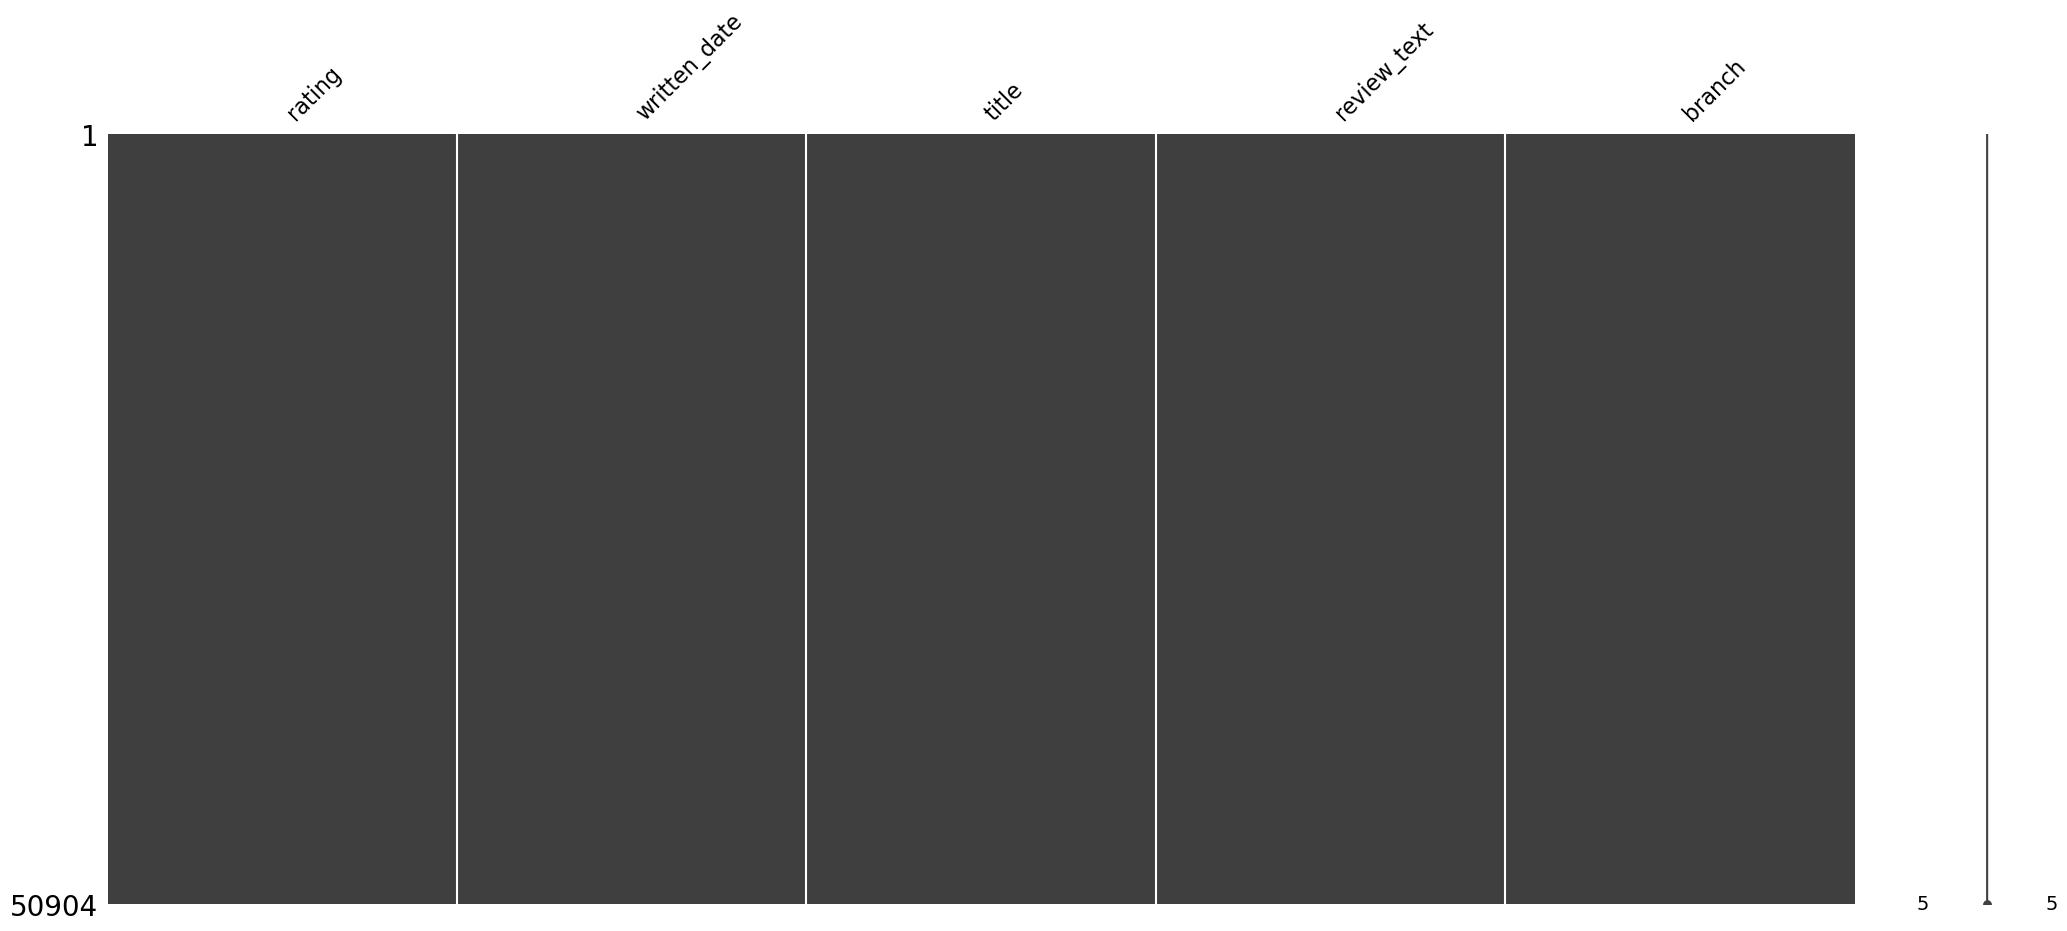

In [8]:
# Missing data in universal studio set - all row was fill with data
missingno.matrix(usb_df)

### 3.1 Display the column/feature names available in usb_df.

In [9]:
# Print the column/feature names
print(usb_df.columns.values)

['rating' 'written_date' 'title' 'review_text' 'branch']


### 3.2 Displaying first five and last five records in usb_df.

In [10]:
# Display the first five rows
usb_df.head()

,rating,written_date,title,review_text,branch
reviewer,,,,,
Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [11]:
# Display the last five rows
usb_df.tail()

,rating,written_date,title,review_text,branch
reviewer,,,,,
vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore
sc_myinitial,5.0,"February 24, 2010",Excellent Sneak Preview,My group managed to get the tickets for the 16...,Universal Studios Singapore


### 3.3 Displaying & remove duplicate data

In [12]:
usb_df.value_counts()

rating  written_date        title                                                                    review_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [13]:
# Remove duplicate records
usb_df.drop_duplicates(inplace=True)

# Recheck again by counting the records. The previous duplicate should be removed.
usb_df.value_counts()

rating  written_date       title                                                                    review_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### 3.4 Display basic statistical information in usb_df

In [14]:
# Display basic statistical information in the dataframe using describe() function.
usb_df.describe()

,rating
count,50859.000000
mean,4.257142
std,1.046513
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
# Dropping title and written_date - unneeded
usb_df = usb_df.drop(['title', 'written_date', ], axis = 1)
usb_df.dropna(inplace = True)

# Remove spaces in columns and replace them with underscore 
usb_df.columns = usb_df.columns.str.replace(" ", "_")

# Set the name of the columns to all lowercase
usb_df.columns = map(str.lower, usb_df.columns)

# Recheck dropped columns
usb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50859 entries, Kelly B to sc_myinitial
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       50859 non-null  float64
 1   review_text  50859 non-null  object 
 2   branch       50859 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


### 3.5 Create Polarity Rating to determing rating based on review

In [16]:
# Create new column of Polarity rating - Assign whether the rating was either Positive/Neutral/Negative
# 4-5 - Positive, 3 - Neutral, 1-2 - Negative
usb_df['polarity_rating'] = usb_df['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))

# Check the newly added Polarity Rating
usb_df.head()

,rating,review_text,branch,polarity_rating
reviewer,,,,
Kelly B,2.0,We went to Universal over Memorial Day weekend...,Universal Studios Florida,Negative
Jon,1.0,The food service is horrible. I’m not reviewin...,Universal Studios Florida,Negative
Nerdy P,2.0,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,Negative
ran101278,4.0,When a person tries the test seat for the ride...,Universal Studios Florida,Positive
tammies20132015,5.0,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,Positive


### 3.6 Data Visualization on Rating & Polarity Rating

Text(-12.805555555555534, 0.5, 'Number of Respondents')

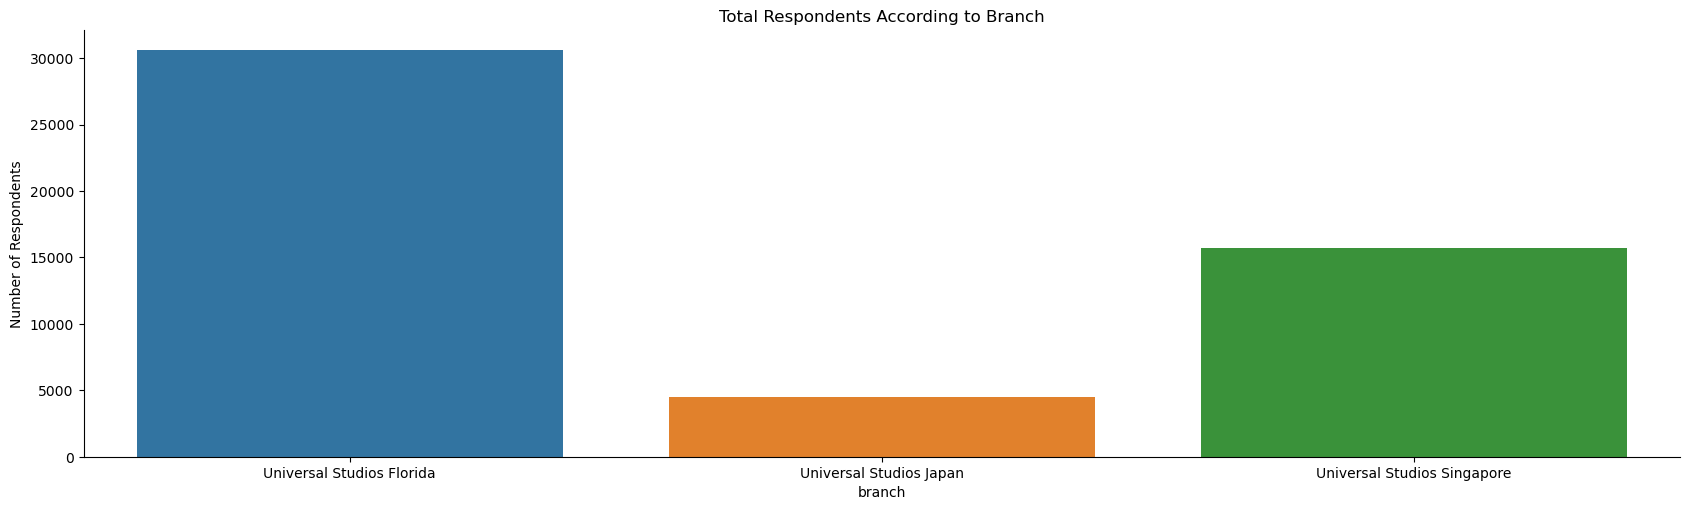

In [19]:
# Total number of respondents based on branch
sns.catplot(x="branch", kind="count", palette="tab10", data=usb_df, height=5, aspect=3.4)
plt.title("Total Respondents According to Branch")
plt.xlabel("branch")
plt.ylabel("Number of Respondents")

<AxesSubplot:xlabel='rating', ylabel='count'>

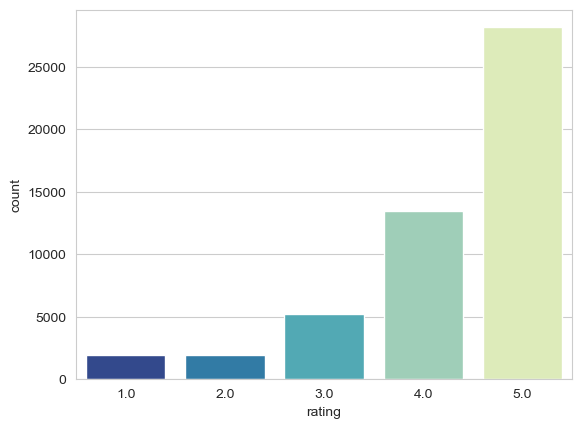

In [20]:
# Display the count of each of the rating - 5 being the highest count
sns.set_style("whitegrid")
sns.countplot(x = "rating", data = usb_df, palette = "YlGnBu_r")

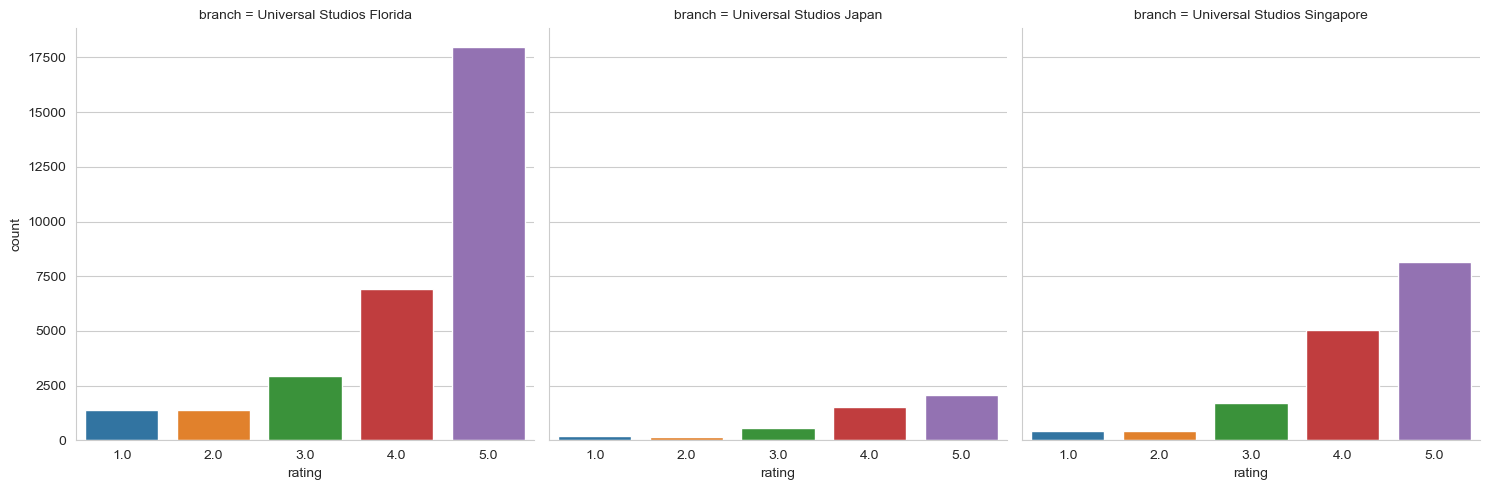

In [21]:
# Count each rating with branch
sns.catplot(x = 'rating', col = 'branch', data = usb_df, kind = 'count')

<AxesSubplot:xlabel='polarity_rating', ylabel='count'>

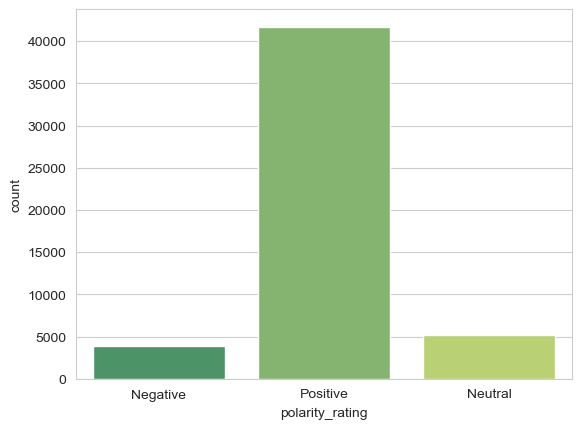

In [22]:
# Display the count of polarity rating - Positive has the highest count
sns.set_style('whitegrid')
sns.countplot(x = 'polarity_rating', data = usb_df, palette = 'summer')

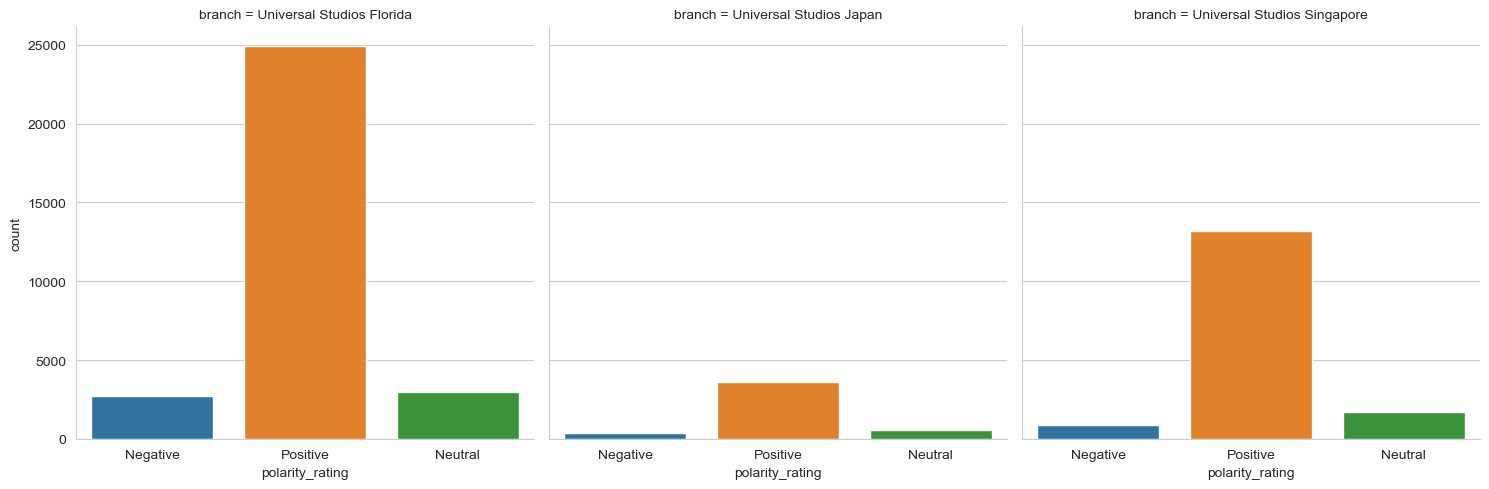

In [23]:
# Count each ppolarity rating with branch
sns.catplot(x = 'polarity_rating', col = 'branch', data = usb_df, kind = 'count')

###  3.7 Differentiate Polarity Rating which is positive, neutral, negative

In [24]:
# Create a dataframe for each of the polarity rating - take the first 8000 for positive rating
df_Positive = usb_df[usb_df['polarity_rating'] == 'Positive'][0:8000]
df_Neutral = usb_df[usb_df['polarity_rating'] == 'Neutral']
df_Negative = usb_df[usb_df['polarity_rating'] == 'Negative']

print ("df_Positive shape: ", df_Positive.shape)
print ("df_Neutral shape: ", df_Neutral.shape)
print ("df_Negative shape: ", df_Negative.shape)

df_Positive shape:  (8000, 4)
df_Neutral shape:  (5226, 4)
df_Negative shape:  (3953, 4)


In [25]:
# Display the first five data frame for Positive
df_Positive.head()

,rating,review_text,branch,polarity_rating
reviewer,,,,
ran101278,4.0,When a person tries the test seat for the ride...,Universal Studios Florida,Positive
tammies20132015,5.0,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,Positive
Jen,4.0,We spent 6 nights on site at Sapphire Falls as...,Universal Studios Florida,Positive
Mandee L,5.0,Universal Adventure Park was the best out of t...,Universal Studios Florida,Positive
Nancy C,5.0,For all ages rides and restaurants lots of pho...,Universal Studios Florida,Positive


In [26]:
# Display the first five data frame for Neutral
df_Neutral.head()

,rating,review_text,branch,polarity_rating
reviewer,,,,
Wendy L,3.0,"Many fun simulator rides and I love the ""Wizar...",Universal Studios Florida,Neutral
amway60436,3.0,First off most of the information given to me ...,Universal Studios Florida,Neutral
Kathy E,3.0,My husband and I visited Universal a couple ye...,Universal Studios Florida,Neutral
Krosener314,3.0,we had the dining pass but the wait times were...,Universal Studios Florida,Neutral
GJPRUD,3.0,Wait in long lines everywhere. Ok so there is ...,Universal Studios Florida,Neutral


In [27]:
# Display the first five data frame for Negative
df_Negative.head()

,rating,review_text,branch,polarity_rating
reviewer,,,,
Kelly B,2.0,We went to Universal over Memorial Day weekend...,Universal Studios Florida,Negative
Jon,1.0,The food service is horrible. I’m not reviewin...,Universal Studios Florida,Negative
Nerdy P,2.0,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,Negative
John,1.0,Worst experience I have ever had the rides are...,Universal Studios Florida,Negative
annapN7702ZW,2.0,"I just expected more. Alot of waiting around, ...",Universal Studios Florida,Negative


In [28]:
# Taking sample from the current list from Neutral & Negative to complete 8000 count.
df_Neutral_over = df_Neutral.sample(8000, replace = True)
df_Negative_over = df_Negative.sample(8000, replace = True)

# Display all of the current shape to be combined
print ("df_Positive shape: ", df_Positive.shape)
print ("df_Neutral_over shape: ", df_Neutral_over.shape)
print ("df_Negative_over shape: ", df_Negative_over.shape)

# Combine all the data frame with 8000 rows in one data frame (df)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis = 0)

# Display the combined data frame
print ("Overall df shape: ", df.shape)

df_Positive shape:  (8000, 4)
df_Neutral_over shape:  (8000, 4)
df_Negative_over shape:  (8000, 4)
Overall df shape:  (24000, 4)


### 3.8 Data Process

In [29]:
# Removing stopwords & punctuation is required - using nltk library. 
# We would not want these words to take up space in our database, or taking up valuable processing time.
# A stopword is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, 
# both when indexing entries for searching and when retrieving them as the result of a search query.
# We would not want these words to take up space in our database, or taking up valuable processing time.

def get_text_processing(text):
    
    # Get the stopword list from stopwords library (english)
    stpword = stopwords.words('english')
    
    # Get the character that is not in the list of punctuation 
    # Punctuation: full stops, question marks, commas, colons and semi-colons, exclamation marks and quotation marks.
    no_punctuation = [char for char in text if char not in string.punctuation]
    
    # Join / combine the character without no punctuation
    no_punctuation = ''.join(no_punctuation)
    
    # Return the 
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [30]:
# Apply the method "get_text_processing" into column review text
df['review'] = df['review_text'].apply(get_text_processing)

# Display the first five record - notice that the review already removed several characters.
df.head()

,rating,review_text,branch,polarity_rating,review
reviewer,,,,,
ran101278,4.0,When a person tries the test seat for the ride...,Universal Studios Florida,Positive,person tries test seat rides gets green light ...
tammies20132015,5.0,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,Positive,Ok cant stress enough anyone everyone go Unive...
Jen,4.0,We spent 6 nights on site at Sapphire Falls as...,Universal Studios Florida,Positive,spent 6 nights site Sapphire Falls family 6 2 ...
Mandee L,5.0,Universal Adventure Park was the best out of t...,Universal Studios Florida,Positive,Universal Adventure Park best two went impress...
Nancy C,5.0,For all ages rides and restaurants lots of pho...,Universal Studios Florida,Positive,ages rides restaurants lots photo opportunitie...


In [31]:
# Create new data frame containing only the review and Polarity_Rating, assign to the same data frame
df = df[['review', 'polarity_rating']]
df.head()

,review,polarity_rating
reviewer,,
ran101278,person tries test seat rides gets green light ...,Positive
tammies20132015,Ok cant stress enough anyone everyone go Unive...,Positive
Jen,spent 6 nights site Sapphire Falls family 6 2 ...,Positive
Mandee L,Universal Adventure Park best two went impress...,Positive
Nancy C,ages rides restaurants lots photo opportunitie...,Positive


In [32]:
# Apply data manipulation of get_dummies to convert categorical into dummy/indicator variable - store in dummy_df.
dummy_df = pd.get_dummies(df["polarity_rating"])

# Drop the polarity_rating column from clrv_df.
df.drop(["polarity_rating"], axis = 1, inplace = True)

# Combine the clrv_df & dummy_df to get the final data frame
final_clrv_df = pd.concat([df, dummy_df], axis = 1)

# Display the first five records in the data frame
final_clrv_df.head()

,review,Negative,Neutral,Positive
reviewer,,,,
ran101278,person tries test seat rides gets green light ...,0,0,1
tammies20132015,Ok cant stress enough anyone everyone go Unive...,0,0,1
Jen,spent 6 nights site Sapphire Falls family 6 2 ...,0,0,1
Mandee L,Universal Adventure Park best two went impress...,0,0,1
Nancy C,ages rides restaurants lots photo opportunitie...,0,0,1


### 3.9 WordCloud Data Visualization

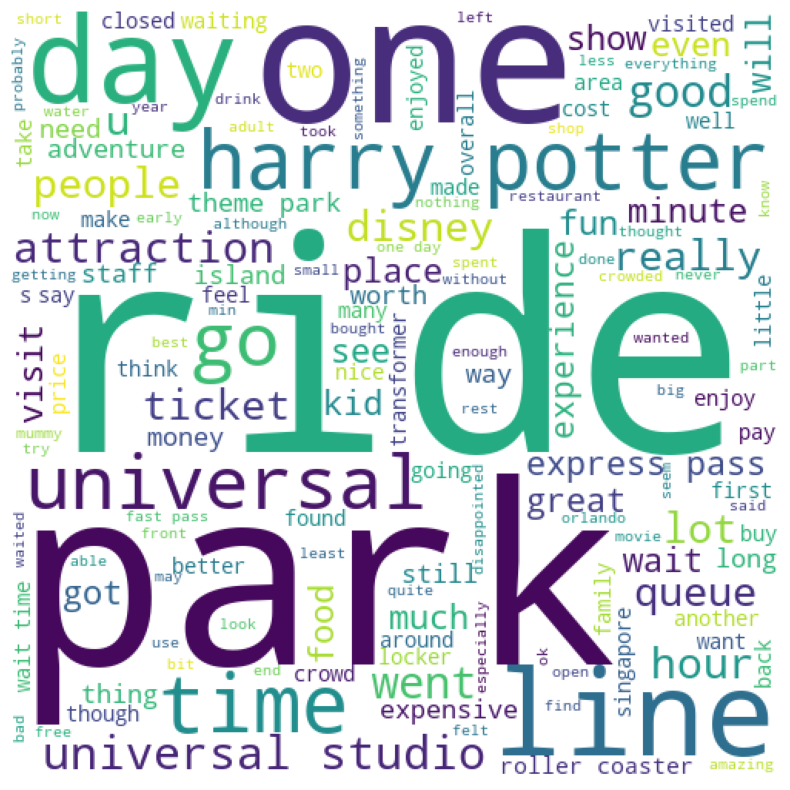

In [33]:
# Using the wordcloud library
# df = pd.read_csv("universal_studio_branches.csv")
df = df_Neutral

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["review_text"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# Plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

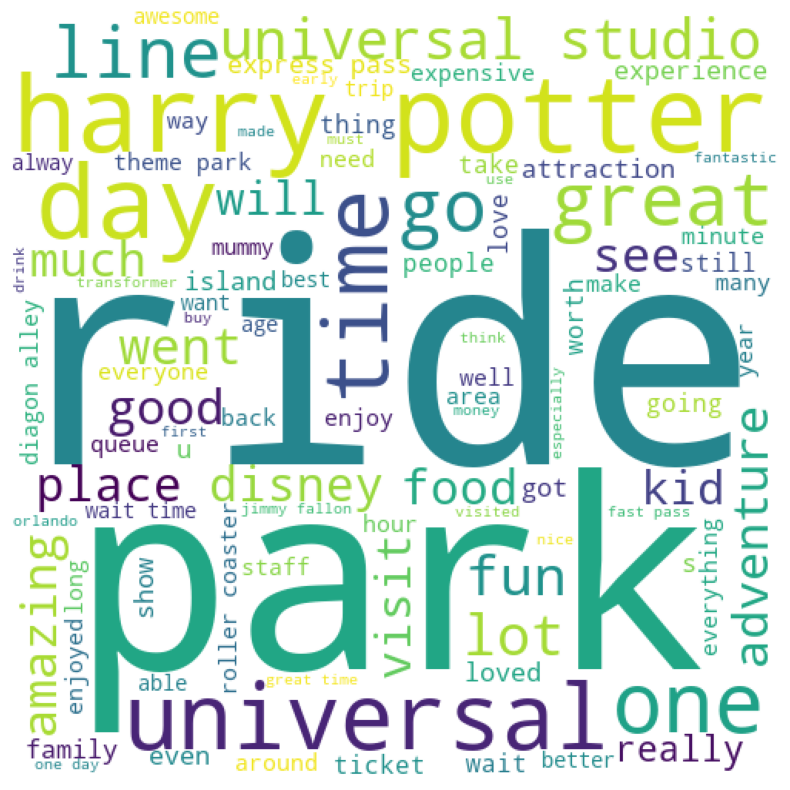

In [34]:
# Using the wordcloud library
# df = pd.read_csv("universal_studio_branches.csv")
df = df_Positive

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["review_text"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# Plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

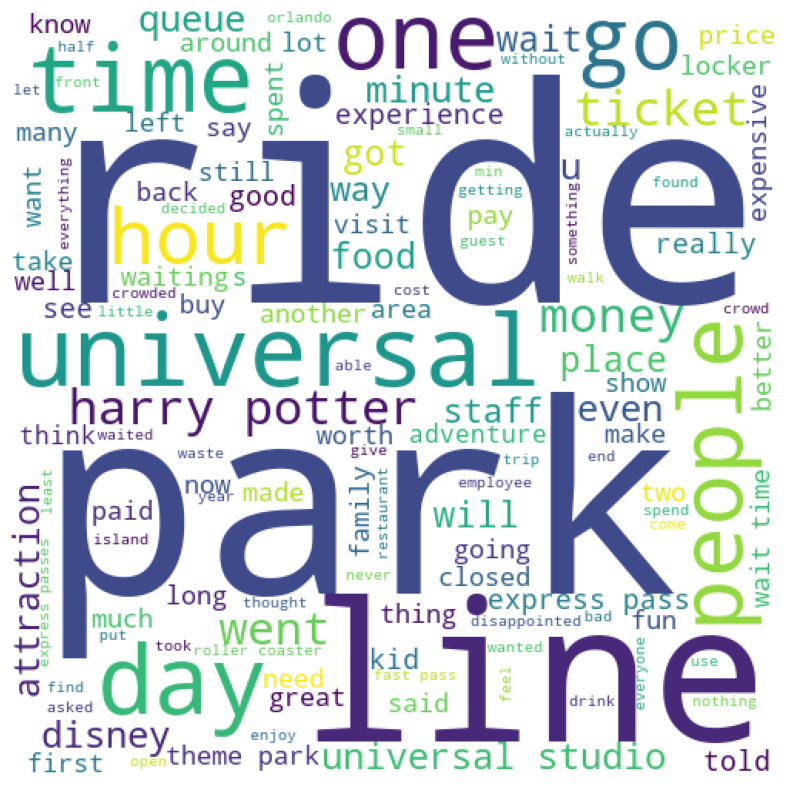

In [35]:
# Using the wordcloud library
# df = pd.read_csv("universal_studio_branches.csv")
df = df_Negative

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["review_text"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# Plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()